# Data Mining using Python 
> Required for Big Data Technologies (ITS66904) Assignment 1

Dataset available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii).

The Online Retail II dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

## Import libraries 

I'll be using the following libraries for this notebook. 

1. **Pandas**: For data manipulation and analysis.
2. **NumPy**: For numerical computations.
3. **Scikit-learn**: For machine learning and data mining algorithms.
4. **Matplotlib** and **Seaborn**: For data visualization.

In [42]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Read the dataset

The Online Retail II dataset is in the `xlsx` file format.

In [2]:
dataset_folder = "./dataset/online+retail+ii/"
df = pd.read_excel(f"{dataset_folder}/online_retail_II.xlsx")

In [3]:
df.shape

(525461, 8)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Preprocessing
These just include renaming the columns, removing null values, and so on...

In [7]:
# Renaming columns

def snake_case(string: str) -> str: 
    return string.lower().replace(" ", "_")

new_columns = { col: snake_case(col) for col in df.columns }
df = df.rename(columns=new_columns)

In [8]:
df

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [9]:
df.isna().sum()

invoice             0
stockcode           0
description      2928
quantity            0
invoicedate         0
price               0
customer_id    107927
country             0
dtype: int64

We only have null values on the columns `description` and `customer_id`.

In [10]:
df.shape

(525461, 8)

In [11]:
df[df["customer_id"].isna()] # only see records where customer_id is null

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [12]:
df.loc[df['quantity'] < 0] # where quantity is negative

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [13]:
df.loc[df['customer_id'] == 16321]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
187,489450,22087,PAPER BUNTING WHITE LACE,12,2009-12-01 10:36:00,2.95,16321.0,Australia


Negative quantities just mean that the items were returned.

In [14]:
df[df['customer_id'].isna()]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [15]:
df.loc[df['invoice'] == 489525]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom


In [16]:
df.loc[df['invoice'] == 489464]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom


### Dropping null values


In [17]:
df = df.dropna(subset=['customer_id'])

In [18]:
df.isna().sum()

invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customer_id    0
country        0
dtype: int64

In [19]:
df.shape

(417534, 8)

## Visualize data

In [20]:
df.columns

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country'],
      dtype='object')

C:\Users\Amogh Shakya\AppData\Local\Temp\ipykernel_7412\3995888476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoicedate'] = pd.to_datetime(df['invoicedate'])


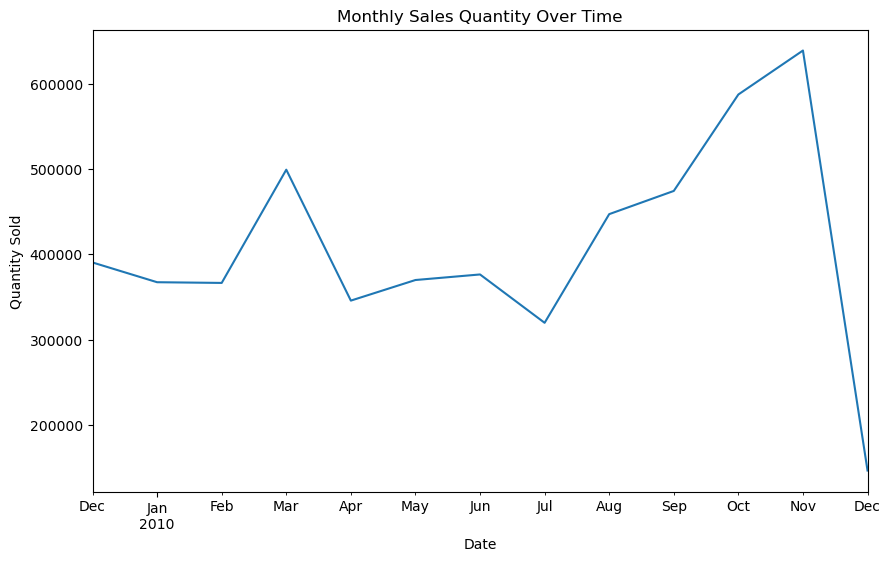

In [27]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df.set_index(df['invoicedate'], inplace=True)

monthly_sales = df['quantity'].resample('M').sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title("Monthly Sales Quantity Over Time")
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

C:\Users\Amogh Shakya\AppData\Local\Temp\ipykernel_7412\3923044034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positive_quantities'] = df['quantity'] > 0


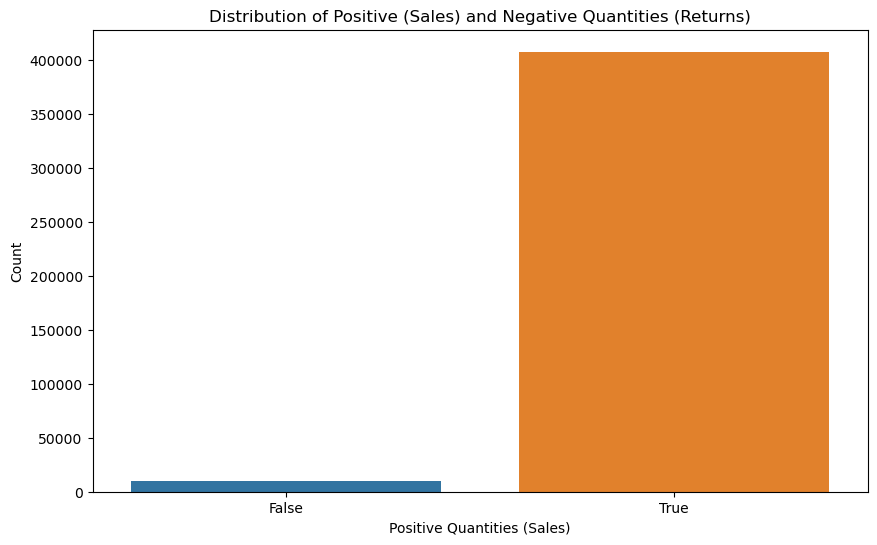

In [28]:
df['positive_quantities'] = df['quantity'] > 0

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='positive_quantities')
plt.title("Distribution of Positive (Sales) and Negative Quantities (Returns)")
plt.xlabel("Positive Quantities (Sales)")
plt.ylabel("Count")
plt.show()

C:\Users\Amogh Shakya\AppData\Local\Temp\ipykernel_7412\3051532653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_spend'] = df['quantity'] * df['price']


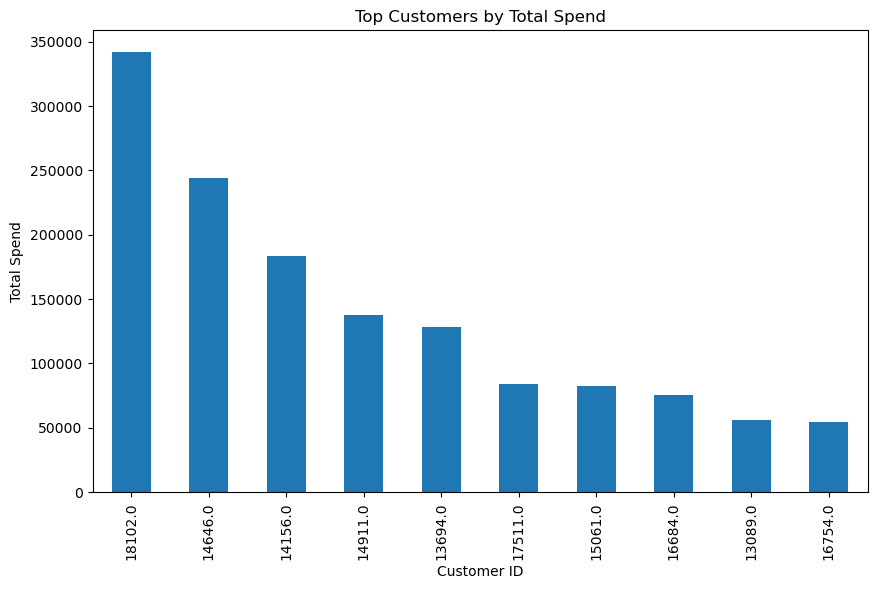

In [30]:
df['total_spend'] = df['quantity'] * df['price']
top_customers = df.groupby('customer_id')['total_spend'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title("Top Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.show()

C:\Users\Amogh Shakya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


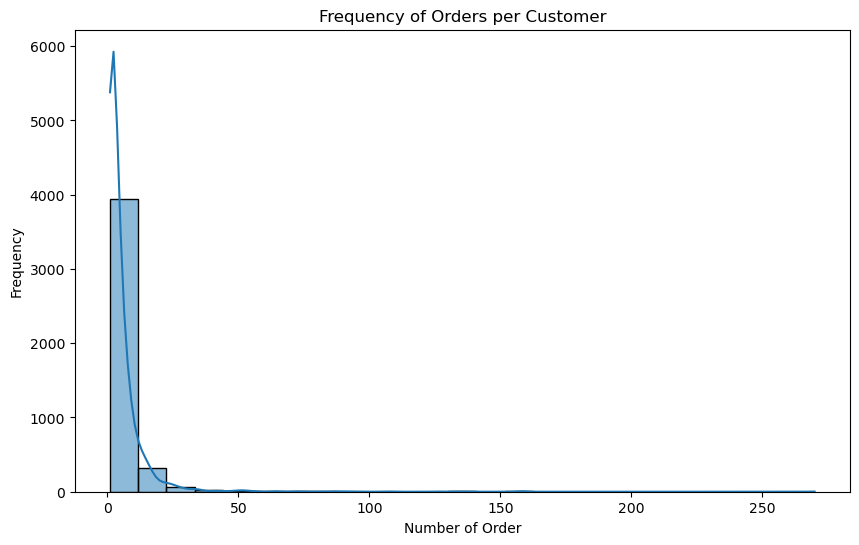

In [36]:
order_counts = df.groupby('customer_id')['invoice'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(order_counts, bins=25, kde=True)
plt.title("Frequency of Orders per Customer")
plt.xlabel("Number of Order")
plt.ylabel("Frequency")
plt.show()

## Data Mining Algorithms

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 417534 entries, 2009-12-01 07:45:00 to 2010-12-09 20:01:00
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice              417534 non-null  object        
 1   stockcode            417534 non-null  object        
 2   description          417534 non-null  object        
 3   quantity             417534 non-null  int64         
 4   invoicedate          417534 non-null  datetime64[ns]
 5   price                417534 non-null  float64       
 6   customer_id          417534 non-null  float64       
 7   country              417534 non-null  object        
 8   positive_quantities  417534 non-null  bool          
 9   total_spend          417534 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 32.3+ MB


In [38]:
df['month'] = df['invoicedate'].dt.month

C:\Users\Amogh Shakya\AppData\Local\Temp\ipykernel_7412\1015531663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['invoicedate'].dt.month


In [39]:
df['month']

invoicedate
2009-12-01 07:45:00    12
2009-12-01 07:45:00    12
2009-12-01 07:45:00    12
2009-12-01 07:45:00    12
2009-12-01 07:45:00    12
                       ..
2010-12-09 20:01:00    12
2010-12-09 20:01:00    12
2010-12-09 20:01:00    12
2010-12-09 20:01:00    12
2010-12-09 20:01:00    12
Name: month, Length: 417534, dtype: int32

In [40]:
# one hot encoding
df = pd.get_dummies(df, columns=['country'])

In [46]:
df = df[df['quantity'] > 0] # remove records with returns

### Clustering (K-means)

C:\Users\Amogh Shakya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


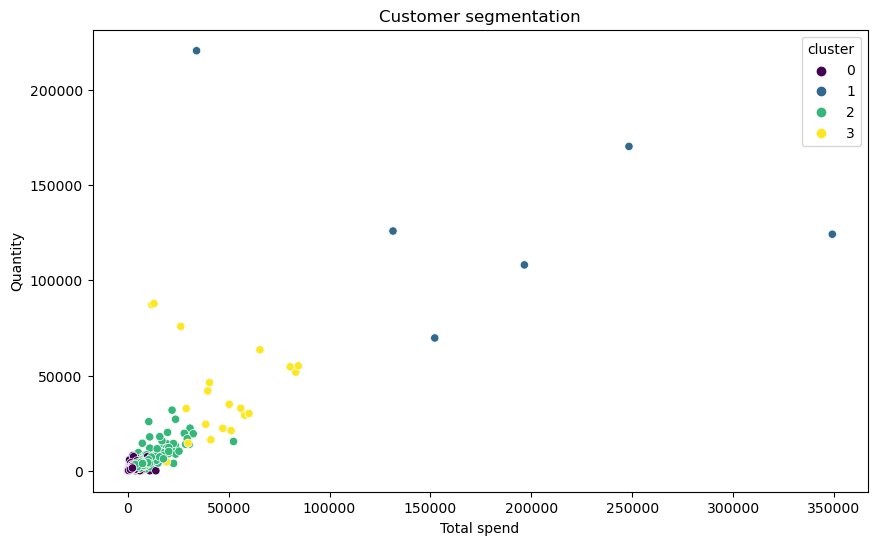

In [45]:
customer_data = df.groupby('customer_id').agg({
    'quantity': 'sum',
    'total_spend': 'sum',
    'invoice': 'nunique'
}).rename(columns={"invoice": "order_count"}).reset_index()

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['quantity', 'total_spend', 'order_count']])

kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)

# visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='total_spend', y='quantity', hue='cluster', palette='viridis')
plt.title("Customer segmentation")
plt.xlabel("Total spend")
plt.ylabel("Quantity")
plt.show()